In [0]:
from scipy.interpolate import griddata
import numpy as np
import operator
from google.colab import files
import pandas as pd

In [0]:
uploaded = files.upload()

Saving pre-processed-mastertable2.csv to pre-processed-mastertable2.csv


In [0]:
data = pd.read_csv('pre-processed-mastertable2.csv')

In [0]:

def distance(lat1,long1,lat2,long2):
  return ((lat1-lat2)**2 + (long1-long2)**2)**-2

def distance2(lat1,long1,lat2,long2):
  return abs(lat1-lat2) + abs(long1-long2)


def itsOkaytoAddZero(lat,long,location):
  for [lat2,long2] in location:
    if distance(lat,long,lat2,long2) < 0.001:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True


def itsOkaytoAddZero2(lat,long,location):
  for [lat2,long2] in location:
    if distance2(lat,long,lat2,long2) < 0.035:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True

In [0]:
location = []
lat = []
long = []
z = []
for i,row in data.iterrows():
  roundedLat = row[5]
  roundedLong = row[6]
  location += [[roundedLat,roundedLong]]
  lat += [roundedLat]
  long += [roundedLong]
  z += [row[8]]
    
minLat = sorted(lat)[2]
maxLat = sorted(lat)[-3]
minLong = sorted(long)[3]
maxLong = sorted(long)[-3]

NameError: ignored

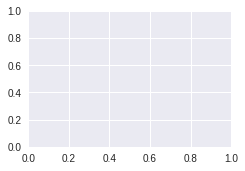

In [5]:
newLat = np.arange(minLat,maxLat,0.05)
newLong = np.arange(minLong,maxLong,0.05)
for lt in newLat:
  for lng in newLong:
    location += [[lt,lng]]
    z += [0]

Location = np.asarray(location,dtype = float)
Z = np.asarray(z,dtype = int)
grid_x, grid_y = np.mgrid[minLat:maxLat:0.001,minLong:maxLong:0.001]

grid = griddata(Location, Z, (grid_x, grid_y), method='linear',fill_value=0.1)



import matplotlib.pyplot as plt
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Linear')

In [0]:
def getIntensity(lat,long):
  x = (lat - minLat)/(maxLat - minLat) * len(grid)
  y = (long - minLong)/(maxLong - minLong) * len(grid)
  return grid_z1[round(x)][round(y)]

In [0]:
getIntensity(28.684, 77.163)

0.6946887193968914

In [0]:
import json

def findLatLong(i,j):
  lat = (i/len(grid) * (maxLat-minLat)) + minLat
  lng = (j/len(grid) * (maxLong-minLong)) + minLong
  return lat,lng

In [0]:
data = []
for i in range(0,len(grid)):
  for j in range(0,len(grid)):
    lat,lng = findLatLong(i,j)
    weight = grid[i][j]
    if weight > 0:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      data += [obj]

In [0]:
with open('crimeCentre.json', 'w') as outfile:
    json.dump(data,outfile)
    
files.download('crimeCentre.json')